In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

mpl.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [57]:
path = 'business_circle.xls'
data = pd.read_excel(path)

## Step 1: explore data


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   基站编号           431 non-null    int64
 1   工作日上班时间人均停留时间  431 non-null    int64
 2   凌晨人均停留时间       431 non-null    int64
 3   周末人均停留时间       431 non-null    int64
 4   日均人流量          431 non-null    int64
dtypes: int64(5)
memory usage: 17.0 KB


In [59]:
data.describe()

,基站编号,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
count,431.000000,431.000000,431.000000,431.000000,431.000000
mean,36977.515081,194.109049,218.241299,288.946636,5375.433875
std,1156.990679,140.076490,201.200426,199.834477,3423.142810
min,35038.000000,35.000000,50.000000,50.000000,811.000000
25%,35980.000000,84.500000,69.500000,126.500000,2353.000000
50%,36940.000000,117.000000,91.000000,194.000000,4750.000000
75%,37967.000000,362.500000,439.500000,473.500000,7726.500000
max,38999.000000,449.000000,600.000000,699.000000,12942.000000


## Step 2: preprocess data

In [60]:
## 离差标准化
data.set_index(['基站编号'], inplace=True)
raw_data = data
data = (data - data.min()) / (data.max() - data.min())

## Step 3: build model

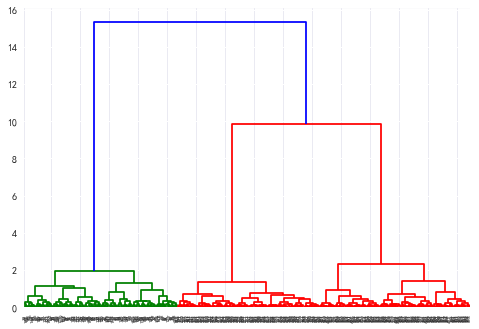

In [61]:
## 先使用scipy的层次聚类来观察聚类特征
Z = linkage(data, method='ward', metric='euclidean')
P = dendrogram(Z, 0)
plt.show()

# 由图可知，聚类成三类会比较好

In [62]:
# 再用sklearn进行聚类
clusters = 3
model = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

## Step 4: visiualize

In [63]:
result = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
result.columns = list(result.columns)[:-1] + ['聚类类别']

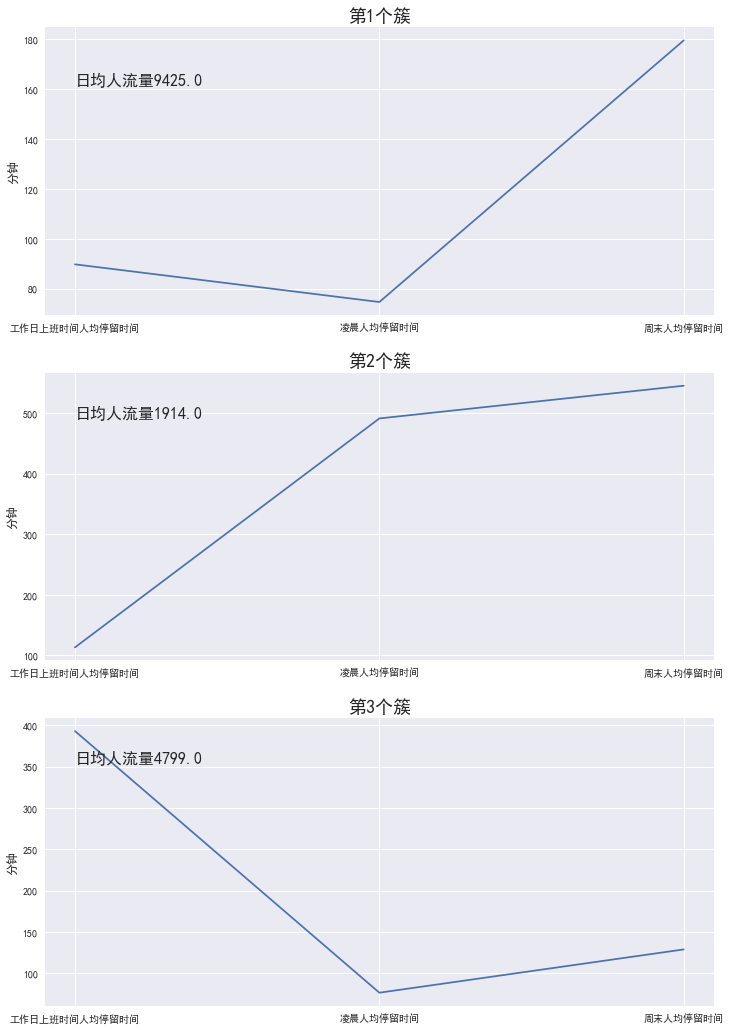

In [89]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))
xlabels = ['工作日人均停留时长', '凌晨人均停留市场', '周末人均停留时长', '日均人流量']

for i in range(clusters):
    temp_data = result[result['聚类类别']==i].iloc[:, :4].mean()
    temp_data = temp_data * (raw_data.max() - raw_data.min()) + raw_data.min()
    ax[i].plot(temp_data[:3])
    ax[i].set_ylabel("分钟", fontsize=12)
    ax[i].text(0, temp_data[:3].max()*9/10, f'日均人流量{temp_data[-1].round()}', fontsize=16)
    ax[i].set_title(f'第{i+1}个簇', fontsize=18)

## 分析脑图



!['a'](business_circle_mindmap.png)